In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("./data/crop.yield.prediction.csv")
df

,crop,ton/ha_yield,rainfall,pesticides_tonnes,temperature,season
0,Tapioca (Cassava),20.5381,1034.0,75000.0,25.58,Rabi
1,Tapioca (Cassava),20.5381,975.0,75000.0,26.88,Kharif
2,Tapioca (Cassava),20.5381,989.0,75000.0,25.79,Kharif
3,Tapioca (Cassava),20.5381,940.0,75000.0,24.10,Rabi
4,Tapioca (Cassava),20.5381,1061.0,75000.0,25.25,Rabi
...,...,...,...,...,...,...
4043,Wheat,3.1538,835.0,45620.0,27.14,Rabi
4044,Wheat,3.1538,660.0,45620.0,25.98,Rabi
4045,Wheat,3.1538,711.0,45620.0,27.44,Rabi
4046,Wheat,3.1538,842.0,45620.0,27.44,Rabi


In [6]:
unique_crops = np.unique(df["crop"]).tolist()
seasons = np.unique(df["season"]).tolist()
unique_crops, seasons

(['Jowar',
  'Maize',
  'Potatoes',
  'Rice',
  'Soybeans',
  'Sweet potatoes',
  'Tapioca (Cassava)',
  'Wheat'],
 ['Kharif', 'Rabi'])

In [7]:
import seaborn as sns

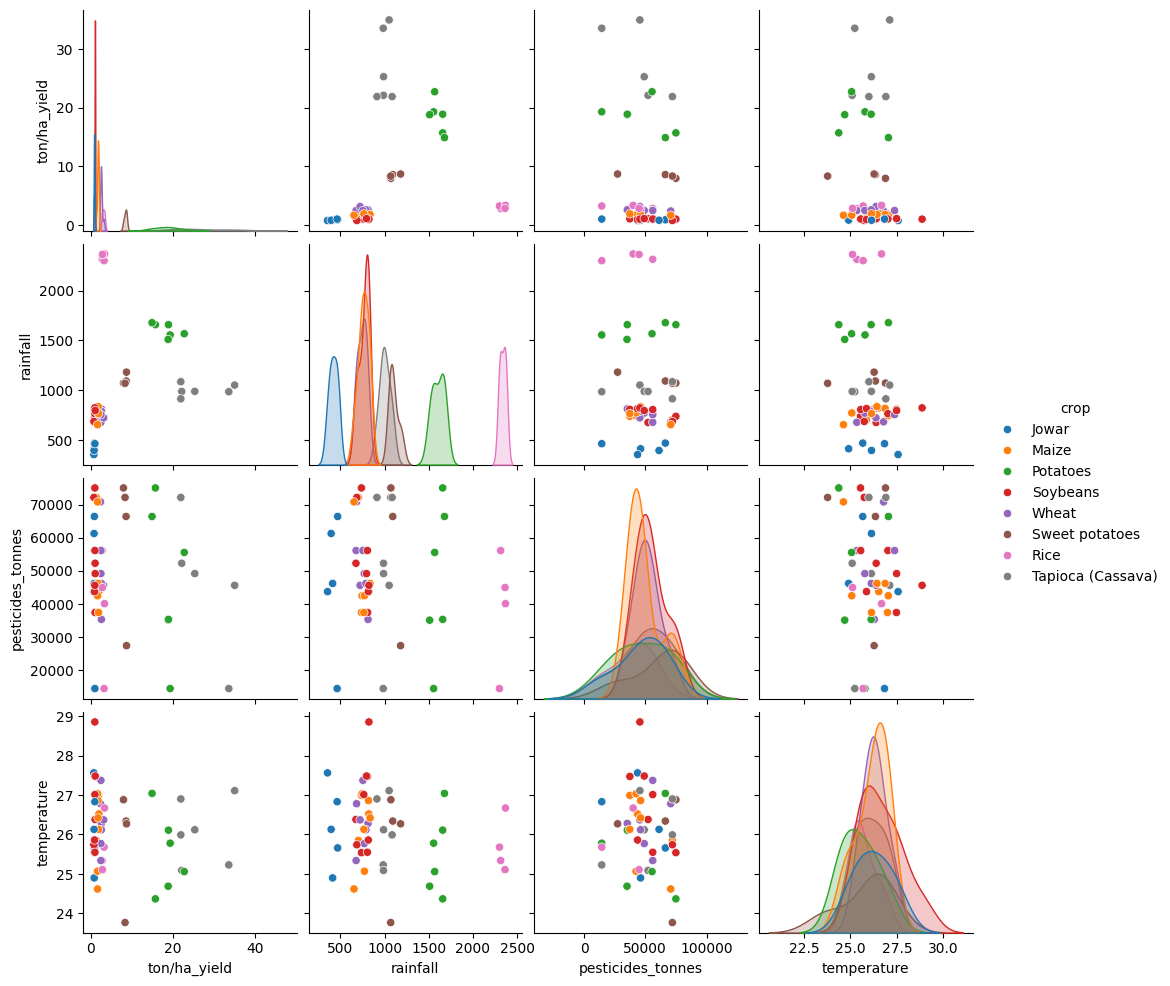

In [9]:
sns.pairplot(df.sample(n=50), hue="crop")

In [10]:
df["crop"] = df["crop"].map(lambda x: unique_crops.index(x))

In [11]:
df["season"] = df["season"].map(lambda x: seasons.index(x))

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
crop,4048.0,3.500000,2.291571,0.0000,1.750000,3.5000,5.2500,7.0000
ton/ha_yield,4048.0,8.088447,9.595022,0.6553,1.370475,2.8124,11.2471,38.5818
rainfall,4048.0,1093.814476,589.388891,300.0000,719.000000,874.5000,1293.0000,2474.0000
pesticides_tonnes,4048.0,48459.040000,14997.351972,14485.3300,37423.000000,46195.0000,61257.0000,75000.0000
temperature,4048.0,26.012589,0.909861,23.2600,25.460000,25.9800,26.6700,28.8500
season,4048.0,0.536808,0.498705,0.0000,0.000000,1.0000,1.0000,1.0000


In [13]:
from sklearn.model_selection import train_test_split

X = df.drop("ton/ha_yield", axis=1).to_numpy()
y = df["ton/ha_yield"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import time

def run_model(model, fit = True):
    begin = time.time()
    name = model.__class__.__name__

    if fit: 
        model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    ret = {}

    ret["MAE"] = mean_absolute_error(y_test, y_pred)
    ret["RMSE"] = mean_squared_error(y_test, y_pred, squared=False)
    ret["time"] = time.time() - begin


    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    ax[0].set_title(f"test vs predicted data - {name}")
    sns.lineplot(y_test - y_pred, ax=ax[0])
    # sns.lineplot(y_pred, ax=ax[0])

    ax[1].set_title(f"absolute error (fraction) - {name}")
    sns.scatterplot(abs(y_pred - y_test) / y_pred, ax=ax[1], s=2).set_ylim(0, 2)


    return ret

> testing model: RandomForestRegressor
  MAE:  0.00367
  RMSE: 0.0243
  time taken: 0.0955s
> testing model: SVR
  MAE:  6.71
  RMSE: 11.4
  time taken: 0.425s
> testing model: Ridge
  MAE:  7.16
  RMSE: 9.15
  time taken: 0.0108s


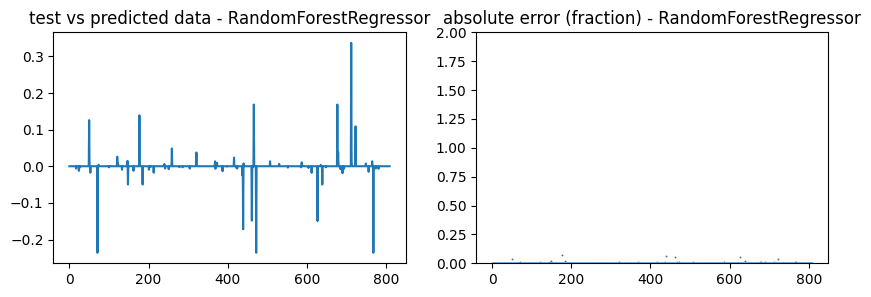

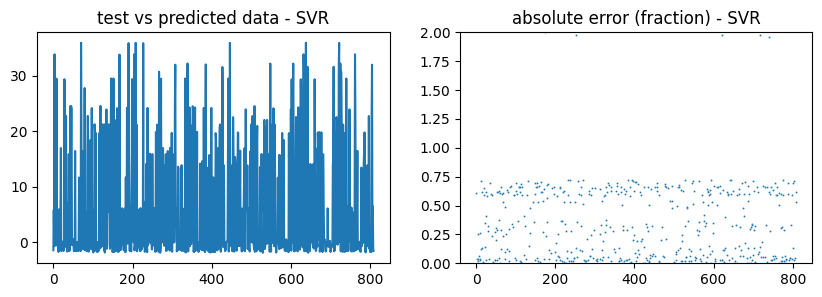

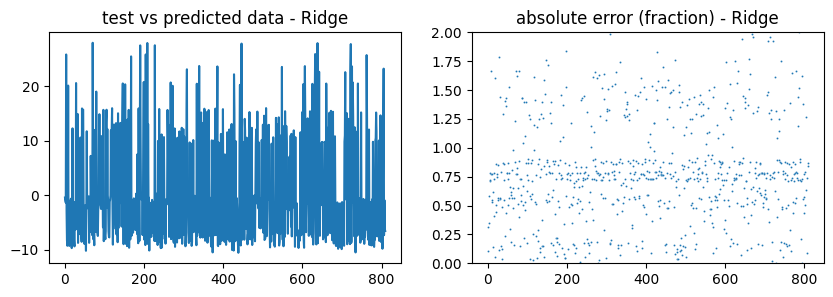

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge


regressors = [RandomForestRegressor(random_state=42,n_estimators=20),
              SVR(),
              Ridge(alpha=0.5)]

for model in regressors:
    print(f"> testing model: {model.__class__.__name__}")
    score = run_model(model)
    print(f"  MAE:  {score['MAE'] :.{3}}")
    print(f"  RMSE: {score['RMSE']:.{3}}")
    print(f"  time taken: {score['time']:.{3}}s")

In [16]:
from joblib import dump, load

dump(regressors[0], "./out/yield.prediction.joblib")

['./out/yield.prediction.joblib']

  MAE:  0.00367
  RMSE: 0.0243
  time taken: 0.0948s


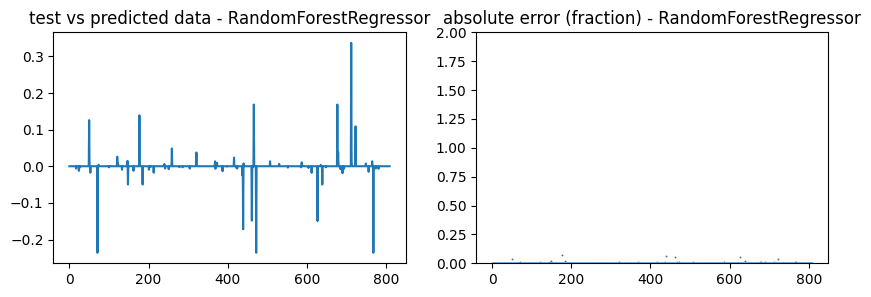

In [17]:
reg = load("./out/yield.prediction.joblib")

score = run_model(reg)
print(f"  MAE:  {score['MAE'] :.{3}}")
print(f"  RMSE: {score['RMSE']:.{3}}")
print(f"  time taken: {score['time']:.{3}}s")